In [19]:
# # sample neuron graph parts?
# nodes = [0,0,0,0,0,0,0,0,0,0,0,0,0,0] # like bias list
# edges =[
#     [0,1,0], # from, to, weight
#     [1,2,0],
#     [2,3,0],
#     [3,4,0],
#     [4,5,0],
# ]
# I = [0,1,2]
# O = [3,4,5]

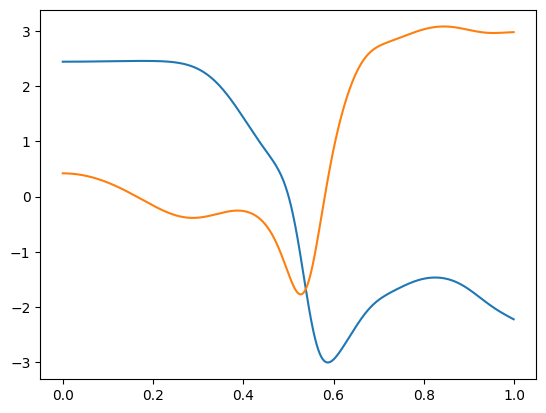

In [20]:
import random
import math 
import cmath
class NeuronGraph:
    def __init__(self,n_nodes,n_edges,n_inputs,n_outputs,num_thinks):
        self.n_nodes = n_nodes
        self.n_edges = n_edges
        
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.num_thinks = num_thinks
        
        self.base_nodes = self.create_nodes()
        self.base_edges = self.create_edges()
        self.original_I,self.original_O = self.create_I_O()
        
        self.nodes = self.base_nodes.copy()
        self.edges = self.base_edges.copy()
        self.I,self.O = self.original_I.copy(),self.original_O.copy()
    
    def create_nodes(self):
        n_nodes = self.n_nodes
        a = random.gauss(0,1)
        b = random.gauss(0,1)
        w = random.gauss(0,1)
        complex_bias = w * cmath.exp(b*1j +a) 
        return [complex_bias for _ in range(n_nodes)]
    
    def create_edges(self):
        
        n_nodes = self.n_nodes
        n_edges = self.n_edges
        
        edges = []
        
        for _ in range(n_edges):
            index_1 = random.randint(0,n_nodes-1)
            index_2 = random.randint(0,n_nodes-1)
            while index_1 == index_2:
                index_2 = random.randint(0,n_nodes-1)
            weight = random.gauss(0,1)
           
            edges.append([index_1,index_2,weight])
        return edges
    
    def create_I_O(self):
        n_nodes = self.n_nodes
        n_inputs = self.n_inputs
        n_outputs = self.n_outputs
        I = []
        O = []
        
        for _ in range(n_inputs):
            input_index = random.randint(0,n_nodes-1)
            while input_index in I or input_index in O:
                input_index = random.randint(0,n_nodes-1)
            I.append(input_index)
        for _ in range(n_outputs):
            output_index = random.randint(0,n_nodes-1)
            while output_index in O or output_index in I:
                output_index = random.randint(0,n_nodes-1)
            O.append(output_index)
        return I,O

    def interact(self, edge):
        index_1, index_2, weight = edge
        v_1 = self.nodes[index_1]
        phase_angle = v_1.real
        phasor = cmath.exp(phase_angle * 1j)
        self.nodes[index_2] += phasor

        
    def reset(self):
        self.nodes = self.base_nodes.copy()
        self.edges = self.base_edges.copy()
        self.I,self.O = self.original_I.copy(),self.original_O.copy()
    
    def think(self, inputs):
        num_thinks = self.num_thinks
        I = self.I
        O = self.O
        # Reset nodes at the start
        self.nodes = [0.0 for _ in range(self.n_nodes)]
        if len(inputs) != len(I):
            raise ValueError("inputs must be the same length as I")
        for i in range(len(I)):
            self.nodes[I[i]] += cmath.exp(inputs[i]*1j)
        for _ in range(num_thinks):
            for edge in self.edges:
                self.interact(edge)
        thoughts = [self.nodes[o] for o in O]
        return thoughts


    def mutate(self,mutation_rate, learning_rate,relink_rate ):
        self.reset()
        # mutate nodes and edges
        for i in range(len(self.nodes)):
            if random.random() < mutation_rate:
                a = random.gauss(0,learning_rate)
                b = random.gauss(0,learning_rate)
                self.base_nodes[i] += cmath.exp(a + b*1j)
                
        for i in range(len(self.edges)):
            if random.random() < relink_rate:
                self.base_edges[i][0] = random.randint(0,self.n_nodes-1)
            if random.random() < relink_rate:
                self.base_edges[i][1] = random.randint(0,self.n_nodes-1)
                while self.base_edges[i][0] == self.base_edges[i][1]:
                    self.base_edges[i][1] = random.randint(0,self.n_nodes-1)
        # mutate I and O
        for i in range(len(self.I)):
            if random.random() < relink_rate:
                self.I[i] = random.randint(0,self.n_nodes-1)
        for i in range(len(self.O)):
            if random.random() < relink_rate:
                self.O[i] = random.randint(0,self.n_nodes-1)
            
        self.reset()

    def copy(self,neuron_graph):
        self.nodes = neuron_graph.nodes.copy()
        self.edges = neuron_graph.edges.copy()
        self.I = neuron_graph.I.copy()
        self.O = neuron_graph.O.copy()
    
# Example usage
ng = NeuronGraph(n_nodes=3, n_edges=15, n_inputs=1, n_outputs=1, num_thinks=3)

import matplotlib.pyplot as plt

x = [i/1000 for i in range(1000)]
y_real = [ng.think([i])[0].real for i in x]
y_imag = [ng.think([i])[0].imag for i in x]
plt.plot(x,y_real)
plt.plot(x,y_imag)
plt.show()




generation 0
generation 100
generation 200
generation 300
generation 400
generation 500
generation 600
generation 700
generation 800
generation 900
generation 999


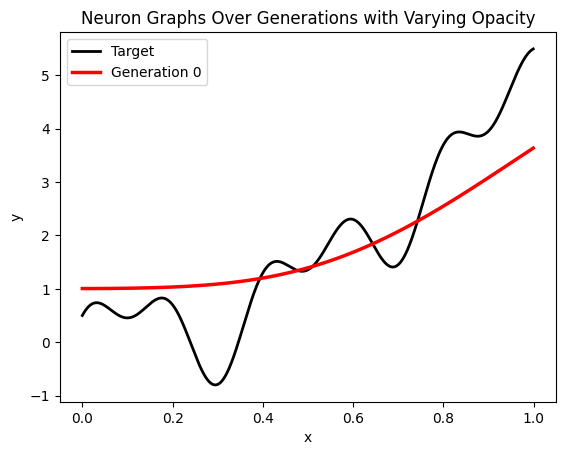

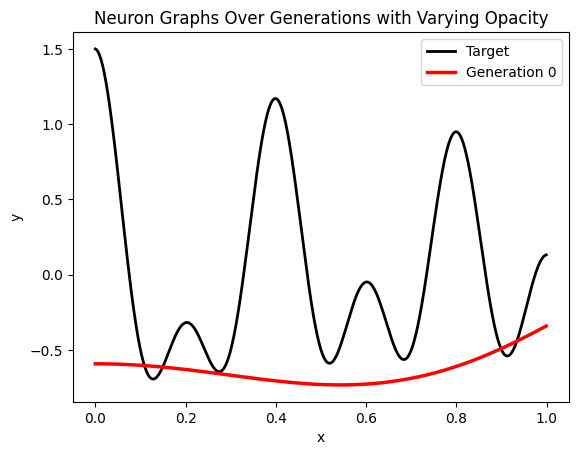

generation 0
generation 100
generation 200
generation 300
generation 400
generation 500
generation 600
generation 700
generation 800
generation 900
generation 999


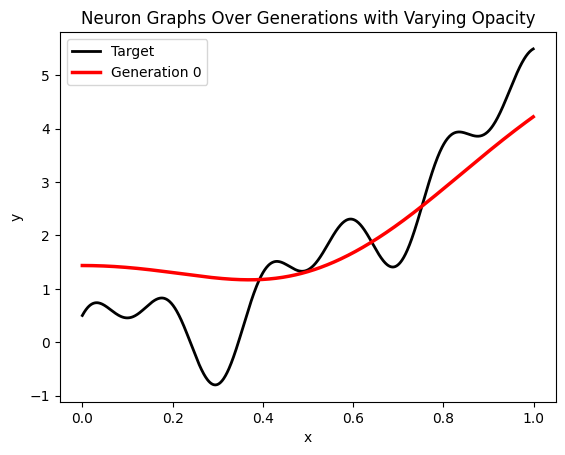

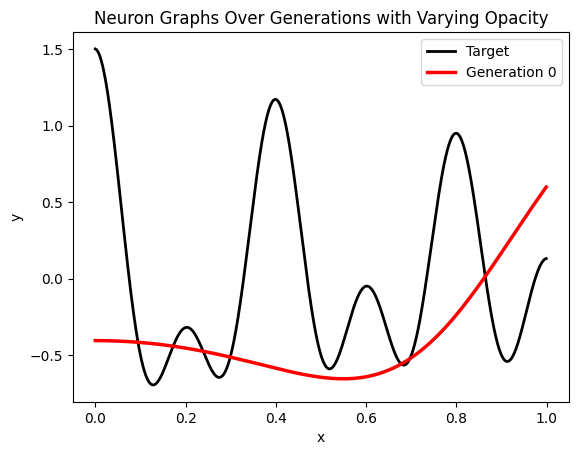

generation 0
generation 100
generation 200
generation 300
generation 400
generation 500
generation 600
generation 700
generation 800
generation 900
generation 999


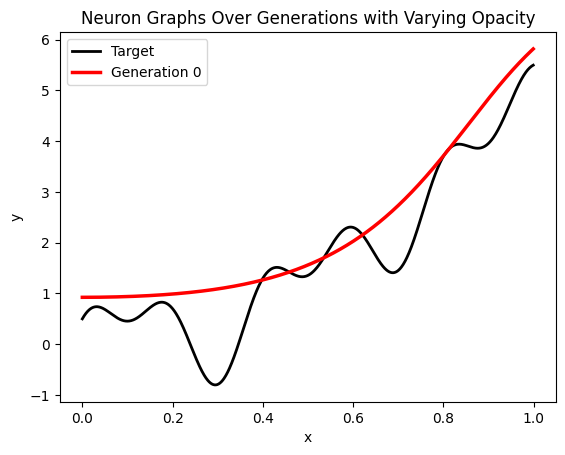

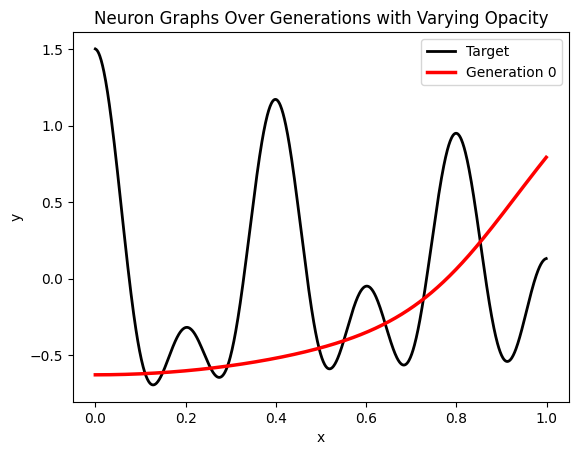

generation 0
generation 100
generation 200
generation 300
generation 400
generation 500
generation 600
generation 700
generation 800
generation 900
generation 999


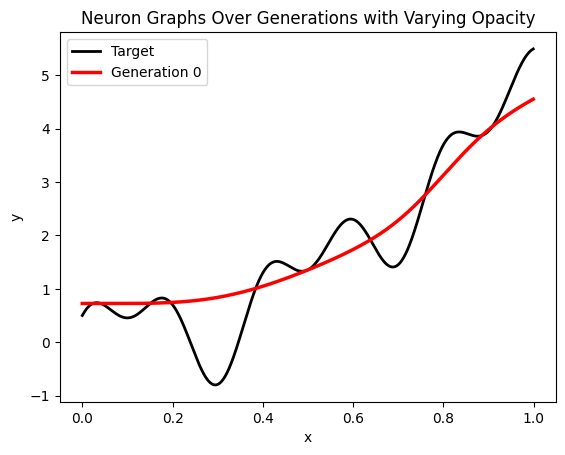

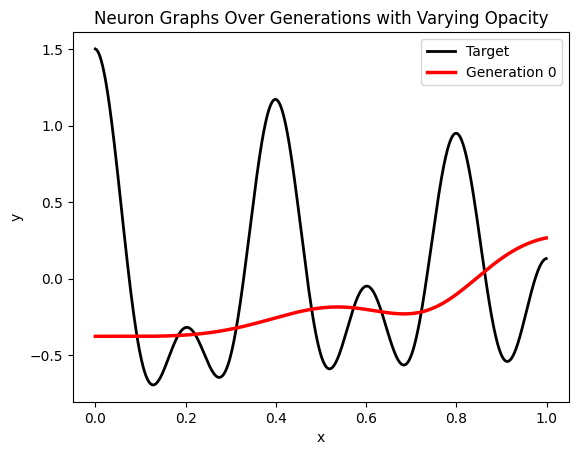

generation 0
generation 100
generation 200
generation 300
generation 400
generation 500
generation 600
generation 700
generation 800
generation 900
generation 999


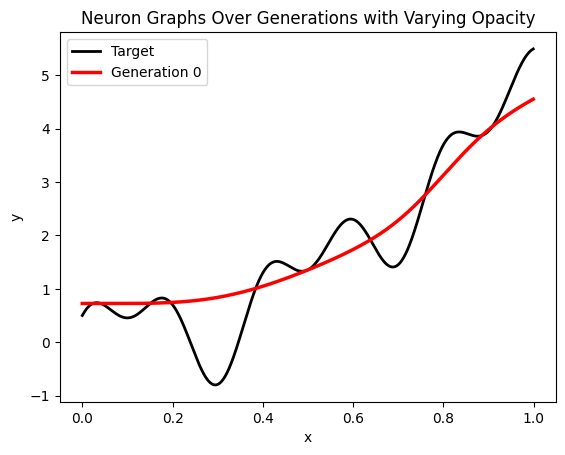

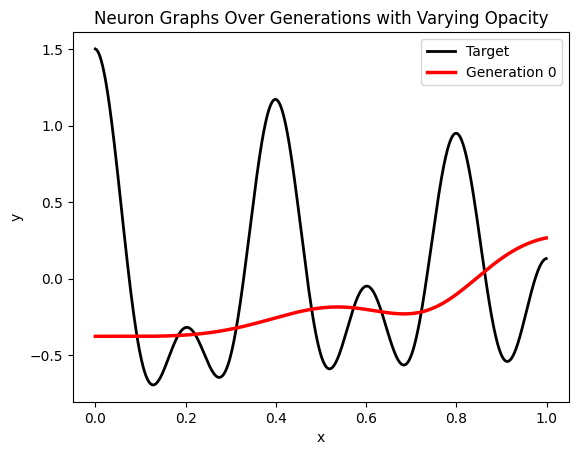

generation 0
generation 100
generation 200
generation 300
generation 400
generation 500
generation 600
generation 700
generation 800
generation 900
generation 999


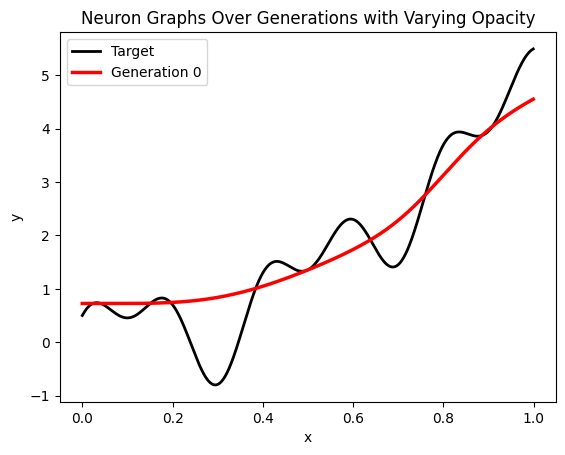

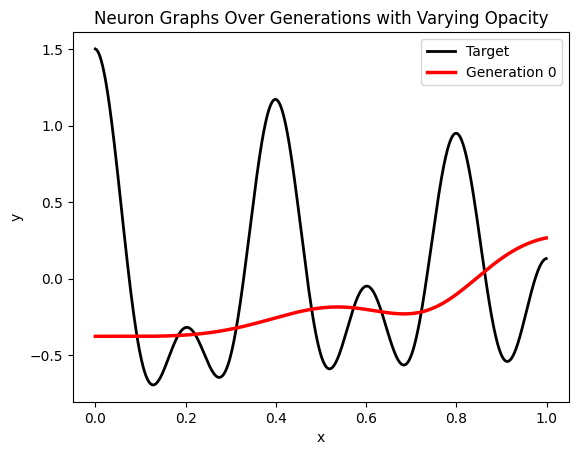

generation 0
generation 100
generation 200
generation 300
generation 400
generation 500
generation 600
generation 700
generation 800
generation 900
generation 999


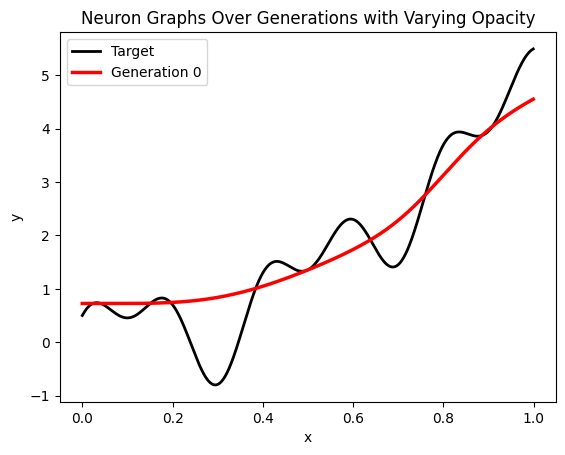

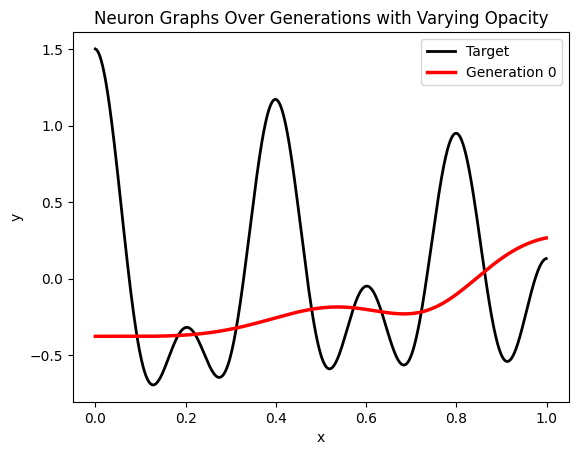

generation 0
generation 100
generation 200
generation 300
generation 400
generation 500
generation 600
generation 700


In [ ]:
import matplotlib.pyplot as plt
import random  # Make sure to import random
import time
# Define the target function
def target_function(x):
    # return math.sin(5 * math.pi * x) * math.exp(-x) + 0.5 * math.cos(10 * math.pi * x)
    # return math.cos(3 * math.pi * x) + 30
    return 5*x**2 + math.sin(5 * math.pi * x) * math.exp(-x) + 0.5 * math.cos(10 * math.pi * x)
    # return 7 * x**3 + x**2 + x + 3
def target_function_2(x):
    return math.cos(5 * math.pi * x) * math.exp(-x) + 0.5 * math.cos(10 * math.pi * x)
    # return math.cos(x) + 3
    # return -5*x**2 + 5


# Parameters
n_nodes = 5
n_edges = 50
n_inputs = 1
n_outputs = 2
num_thinks = 1
num_neuron_graphs = 4
mutation_rate = 0.5
learning_rate = 0.001
relink_rate = 0.5
num_generations = 10000  # Number of generations
num_plots = 10


# Modify the plot_neuron_graph function to handle the latest generation in red
def plot_neuron_graph(neuron_graphs, target_function,index):
    x = [i/1000 for i in range(1000)]
    y = [target_function(i) for i in x]

    # Plot the target function
    plt.plot(x, y, label="Target", color='black', linewidth=2)

    # Adjust the opacity scaling based on generation recency
    num_generations = len(neuron_graphs)
    min_alpha = 0.1
    max_alpha = 0.9

    # Plot neuron graphs with increasing opacity
    for idx, ng in enumerate(neuron_graphs):
        y_real = [ng.think([i])[index].real for i in x]
        if idx == num_generations - 1:
            # Latest generation plotted in red
            plt.plot(x, y_real, color='red', linewidth=2.5, label=f"Generation {idx} (Latest)")
        else:
            # Other generations plotted in blue with varying opacity
            # Adjust denominator to prevent division by zero
            denominator = max(num_generations - 2, 1)
            alpha = min_alpha + (max_alpha - min_alpha) * (idx / denominator)
            # plt.plot(x, y_real, color='blue', alpha=alpha, linewidth=1) 

    # Create legend entries
    legend_labels = ["Target"] + [f"Generation {i}" for i in range(num_generations - 1)] + [f"Generation {num_generations - 1} (Latest)"]
    plt.legend(legend_labels)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Neuron Graphs Over Generations with Varying Opacity")
    plt.show()

def rank(neuron_graphs, target_function):
    # List to store tuples of (score, neuron_graph)
    scored_graphs = []
    num_samples = 200
    
    # Evaluate each neuron graph and calculate its score
    x_samples = [random.random() for _ in range(num_samples)]
    y_samples = [target_function(i) for i in x_samples]
    y_samples_2 = [target_function_2(i) for i in x_samples]
    for neuron_graph in neuron_graphs:
        score = 0
        for i in range(num_samples):
            thought = neuron_graph.think([x_samples[i]])
            thought_1 = thought[0].real
            thought_2 = thought[1].real
            score += abs(y_samples[i] - thought_1)
            score += abs(y_samples_2[i] - thought_2)
        # Append a tuple of (score, neuron_graph) to the list
        scored_graphs.append((score, neuron_graph))
    
    # Sort the list of tuples based on the score (lower is better)
    scored_graphs.sort(key=lambda x: x[0])

    # Extract the sorted neuron graphs
    sorted_neuron_graphs = [ng for (_, ng) in scored_graphs]
    
    return sorted_neuron_graphs

# Initialize neuron graphs
neuron_graphs = [NeuronGraph(n_nodes, n_edges, n_inputs, n_outputs, num_thinks) for _ in range(num_neuron_graphs)]

def evolve(ranked_neuron_graphs):
    # Keep 50% and the rest are mutated copies of the top 50%
    top_half = ranked_neuron_graphs[:len(ranked_neuron_graphs) // 2]
    new_neuron_graphs = top_half.copy()
    for ng in top_half:
        new_ng = NeuronGraph(n_nodes, n_edges, n_inputs, n_outputs, num_thinks)
        new_ng.copy(ng)
        new_ng.mutate(mutation_rate, learning_rate, relink_rate)
        new_neuron_graphs.append(new_ng)
    return new_neuron_graphs

# List to store top neuron graphs from each generation
top_neuron_graphs = []


for i in range(num_plots):

    # Evolution process
    for generation in range(num_generations):
        ranked_neuron_graphs = rank(neuron_graphs, target_function)
        neuron_graphs = evolve(ranked_neuron_graphs)
        # Store the top neuron graph of this generation
        if generation % math.floor(num_generations/10) == 0 or generation == num_generations - 1:
            print("generation",generation)
            top_neuron_graphs.append(ranked_neuron_graphs[0])

    # After evolution, plot the neuron graphs with varying opacity
    plot_neuron_graph(top_neuron_graphs, target_function,0)
    plot_neuron_graph(top_neuron_graphs, target_function_2,1)
